1. Add

2. Repeat the following



In [8]:
import numpy as np
from queue import PriorityQueue
from pyamaze import maze, agent
from scipy.spatial import distance
import networkx as nx 

c:\Users\dorie\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [9]:
class Node:
    def __init__(self, coordinate,g=0,h=0,f=0, parent=None):
        self.linha, self.coluna = coordinate
        self.parent = parent
        self.g = g
        self.h = h
        self.f = f

    def __lt__(self, other):
        return self.f < other.f

    def __eq__(self, other):
        return self.x == other.x and self.y == other.y

In [10]:
def h_score(celula_atual, destino):
    linha_atual, coluna_atual = celula_atual

    linha_destino, coluna_destino = destino

    #manual
    dist = np.sqrt((linha_destino - linha_atual)**2 + (coluna_destino - coluna_atual)**2)
    #funcao pronta
    dist = distance.euclidean(celula_atual, destino)

    return dist.round()

In [11]:
def aestrela (labirinto):
    pass

In [40]:
def obter_vizinhos(matriz,coord):

    if matriz[coord] == 1:
        print("Coordenada inválida")
        return []
    
    else:
        
        linha, coluna = coord
        linhas, colunas = matriz.shape
        vizinhos = []

        direcoes = [(0,1),(0,-1),(1,0),(-1,0), # cima, baixo, direita, esquerda
                    (1,1),(1,-1),(-1,1),(-1,-1)] # diagonais
        
        for dc in direcoes:
            nova_linha, nova_coluna = linha + dc[0], coluna + dc[1]

            if nova_linha >= 0 and nova_linha < linhas and nova_coluna >= 0 and nova_coluna < colunas:
                if matriz[nova_linha,nova_coluna] == 0: #se for uma coordenada sem obstáculos
                    vizinhos.append((nova_linha,nova_coluna))
        
    return vizinhos


In [42]:
def add_obstacles(matriz, num_obstacles=0):
    linhas, colunas = matriz.shape
    obstaculos_added = 0

    np.random.seed(99)
    while obstaculos_added < num_obstacles:
        x = np.random.randint(0,linhas)
        y = np.random.randint(0,colunas)

        if matriz[x,y] == 0:
            matriz[x,y] = 1
            obstaculos_added += 1
    
    return matriz

In [41]:
def inicializar_matriz():
    return np.zeros((11,11),dtype=int)



In [43]:
matriz = inicializar_matriz()
matriz.shape

(11, 11)

In [44]:
coord_teste_1 = (1,1)
vizinhos = obter_vizinhos(matriz,coord_teste_1)
print(vizinhos)

[(1, 2), (1, 0), (2, 1), (0, 1), (2, 2), (2, 0), (0, 2), (0, 0)]


In [45]:
matriz_com_obstaculos = add_obstacles(matriz, 10)

In [46]:
matriz_com_obstaculos

array([[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0],
       [1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [49]:
coord_teste_2 = (0,1)
obter_vizinhos(matriz_com_obstaculos,coord_teste_2)

[(0, 2), (0, 0), (1, 2), (1, 0)]

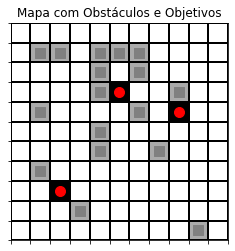

In [61]:
import numpy as np
import matplotlib.pyplot as plt

def exibir_labirinto_com_obstaculos_e_objetivos(mapa_com_obstaculos_e_objetivos):
    # Converte o mapa para um array numpy para plotagem
    mapa_array = np.array(mapa_com_obstaculos_e_objetivos)
    n_linhas, n_colunas = mapa_array.shape

    plt.xticks(np.arange(-0.5, n_colunas, 1), [])
    plt.yticks(np.arange(-0.5, n_linhas, 1), [])
    plt.grid(color='black', linestyle='-', linewidth=2)

    plt.imshow(mapa_array, cmap='binary')

    # Posição dos obstáculos (células com valor 1)
    obstaculos_x, obstaculos_y = np.where(mapa_array == 1)
    plt.scatter(obstaculos_y, obstaculos_x, color='gray', s=100, marker='s', zorder=5)

    # Posição dos objetivos (células com valor 3)
    objetivos_x, objetivos_y = np.where(mapa_array == 3)
    plt.scatter(objetivos_y, objetivos_x, color='red', s=100, marker='o', zorder=5)

    plt.title('Mapa com Obstáculos e Objetivos')
    plt.show()

# Exemplo de uso
mapa_com_obstaculos_e_objetivos = [
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0],
    [0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0],
    [0, 0, 0, 0, 1, 3, 0, 0, 1, 0, 0],
    [0, 1, 0, 0, 0, 0, 1, 0, 3, 0, 0],
    [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0],
    [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
]

# Adicionar pontos objetivos (valor 3) em posições específicas
#mapa_com_obstaculos_e_objetivos[4][5] = 3  # Exemplo de ponto objetivo
#mapa_com_obstaculos_e_objetivos[6][8] = 3  # Outro exemplo de ponto objetivo

exibir_labirinto_com_obstaculos_e_objetivos(mapa_com_obstaculos_e_objetivos)
